<a href="https://colab.research.google.com/github/brunatoloti/data-science-do-zero/blob/main/Minera%C3%A7%C3%A3o%20de%20Textos%20e%20NLP/mineracao_textos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mineração de Textos - NLTK

Neste notebook, terá:
*   Exploração de recursos da NLTK;
*   Abordagem das features da biblioteca com corpus da própria NLTK;
*   Aplicação da NLTK em uma base de dados real.

Importando as bibliotecas

In [ ]:
import nltk

Fazendo o download da base de corpus da NLTK

In [ ]:
 #nltk.download()

Importando o corpus *brown*

*   Corpus com milhares de palavras de várias categorias

In [ ]:
from nltk.corpus import brown

Imprimindo as suas categorias

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Imprimindo as palavras do corpus

In [ ]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

Observe que foi retornada uma lista truncada com palavras de diversas categorias.

Obtendo o número de palavras do corpus

In [ ]:
len(brown.words())

1161192

Obtendo o número de palavras do corpus cuja categoria é *news*

In [ ]:
len(brown.words(categories='news'))

100554

Visualizando sentenças da categoria romance



*   Lista de listas de sentenças.



In [ ]:
brown.sents(categories=['romance'])

[['They', 'neither', 'liked', 'nor', 'disliked', 'the', 'Old', 'Man', '.'], ['To', 'them', 'he', 'could', 'have', 'been', 'the', 'broken', 'bell', 'in', 'the', 'church', 'tower', 'which', 'rang', 'before', 'and', 'after', 'Mass', ',', 'and', 'at', 'noon', ',', 'and', 'at', 'six', 'each', 'evening', '--', 'its', 'tone', ',', 'repetitive', ',', 'monotonous', ',', 'never', 'breaking', 'the', 'boredom', 'of', 'the', 'streets', '.'], ...]

Observe que também é retornada uma lista truncada.

Vejamos a quantidade de sentenças cuja categoria é *romance*

In [ ]:
len(brown.sents(categories=['romance']))

4431

Obtendo as palavras do corpus cuja categoria é *romance*

In [ ]:
romance_words = brown.words(categories=['romance'])

In [ ]:
romance_words

['They', 'neither', 'liked', 'nor', 'disliked', 'the', ...]

In [ ]:
len(romance_words)

70022

Obtendo a frequência de palavras presentes no *romance_words*



*   FreqDist() retorna um dicionário de frequências



In [ ]:
fdist_romance = nltk.FreqDist(w.lower() for w in romance_words)

In [ ]:
#Visualizando as 20 palavras mais frequentes

fdist_romance.most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2988),
 ('and', 1905),
 ('to', 1517),
 ('a', 1383),
 ('of', 1202),
 ('he', 1068),
 ('``', 1045),
 ("''", 1044),
 ('was', 999),
 ('i', 951),
 ('in', 930),
 ('she', 728),
 ('it', 717),
 ('had', 695),
 ('?', 690),
 ('her', 680),
 ('that', 612),
 ('his', 603)]

Palavras presentes em *romance_words* ordenadas por ordem alfabética

In [ ]:
#Imprimindo as 50 primeiras palavras
sorted(set(romance_words))[:50]

['!',
 '&',
 "'",
 "''",
 "'ello",
 "'em",
 "'most",
 '(',
 ')',
 ',',
 '--',
 '.',
 '10',
 '141',
 '160',
 '1935',
 '1936',
 '1938',
 '1940',
 '1944',
 '230',
 '3',
 '4000-plus',
 "6'",
 ':',
 ';',
 '?',
 'A',
 "A's",
 'A-Z',
 "A-Z's",
 'A.M.',
 'A40-AjK',
 'AA',
 'Abernathy',
 'Abernathys',
 'About',
 'Above',
 'Abruptly',
 'Absolution',
 'Acala',
 'Across',
 'Acting',
 'Actually',
 'Adam',
 'Adams',
 'Adele',
 'Adelia',
 'Adrien',
 'African']

Obtendo a frequência de uma palavra específica no corpus cuja categoria é *romance*

In [ ]:
romance_words.count('love')

32

In [ ]:
romance_words.count('hate')

9

Obtendo a frequência em percentual de uma palavra específica no corpus cuja categoria é *romance*

In [ ]:
def percentual_word(freq, dataset):
    total = len(dataset)
    return 100*(freq/total)

In [ ]:
percentual_word(romance_words.count('love'), romance_words)

0.04569992288138014

Transformando palavras em objeto texto

*   Para isso, deve-se passar uma lista de palavras para essa classe.
*   Passaremos aqui, a lista *romance_words* (palavras do corpus cuja categoria é *romance*).

In [ ]:
romance_words = nltk.Text(romance_words)

In [ ]:
type(romance_words)

nltk.text.Text

Imprimindo palavras similares a uma determinada palavra



*   Imprime as palavras mais similares por contexto.
*   Imprime as palavras que, geralmente, são usadas no mesmo contexto da palavra que estou passando por parâmetro.



In [ ]:
#Por default, o método similar() retorna as 20 palavras mais similares por contexto. Posso alterar esse valor conforme a necessidade
romance_words.similar('love')

see that it place know tell want help understand telling hate man he
there him above name one but her


Imprimindo conjuntos de palavras empregadas similarmente



*   Palavras que são muito empregadas juntas em *romance_words* (palavras do corpus cuja categoria é *romance*).


In [ ]:
romance_words.collocations()

New York; Old Man; Mike Deegan; Cousin Elec; Lucille Warren; old man;
Poor John; Cousin Emma; Gratt Shafer; I've got; Mrs. Kirby; could see;
Eddie Lee; Hanford College; young men; Miss Jen; Mr. Willis; Early
Spring; Mrs. Salter; Gertrude Parker


Imprimindo concordância das palavras

*   Basicamente é o contexto no qual a palavra aparece.
*   Consulta onde uma determinada palavra aparece no conjunto.

In [ ]:
romance_words.concordance('love')

Displaying 25 of 36 matches:
yards in which no one knew privacy . Love and hatred and fear were one here , 
l leave you '' . `` Sounds like real love '' , Owen said . `` It sort of bring
 to satisfy any egotist . It was for love that he had served the Navy . To hav
rved the Navy . To have someday that love returned was what he had lived for .
is not having the only man you could love , whether he drives a bread truck or
 you can stay alive and hate him and love him and want him even if it means yo
e him , not even with God . If it is love , you don't . And I'll take you with
her woman , the one that never could love him the way you do , the one who got
ts women under stress indulge in . I love you , I hate you , I feel like killi
 myself , and in the same sequence I love you I think you're the most wonderfu
t , I can understand that by now and love them still , because everyone must j
 of women in towns , dispossessed of love , hanging on to makeshifts , and alt
d like the tails of sag

Imprimindo as empregabilidades comuns entre palavras



*   Encontra os contextos comuns onde essas palavras são empregadas.



In [ ]:
romance_words.common_contexts(['love', 'hate'])

and_him i_you


Verificando dispersão léxica de palavras no conjunto

*   Onde essas palavras acontecem no conjunto, ou seja, qual a localização das mesmas.
*   Determinada palavra começa a aparecer no começo já no começo do conjunto (até umas 1000 palavras, por exemplo), ou começa a aparecer depois? Aparece mais em qual localização do conjunto?
*   Isso pode ser interssante quando temos um conjunto que leva em consideração séries temporais. Por exemplo, dados de notícias, dados de reviews. Análise de quando começou a aparecer determinado termo em notícias, por exemplo; ou, a partir de quando, as reviews do site começaram a ter certas palavras que definem certa coisa.

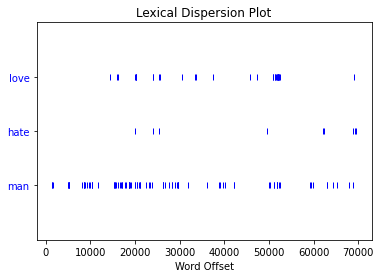

In [ ]:
romance_words.dispersion_plot(['love', 'hate', 'man'])

##Aplicando NLTK em uma base de dados real

*   Usaremos uma base de dados real de tweets sobre o governo de Minas Gerais.
*   Base de dados disponibilizada no curso de **Data Science do Zero do Minerando Dados**.
*   O Twitter é uma rede social muito utilizada por empresas para análises.
*   Trabalhar com o idioma português ainda é um desafio.

Importando as bibliotecas

In [ ]:
import pandas as pd

Carregando a base de dados

In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/Curso Data Science do Zero/Mineração de Textos e NLP/dados/Tweets_Mg.csv')

In [ ]:
tweets.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Obtendo o número de linhas e colunas

In [ ]:
print(f'O número de linhas dessa base de dados é {tweets.shape[0]}')
print(f'O número de colunas dessa base de dados é {tweets.shape[1]}')

O número de linhas dessa base de dados é 8199
O número de colunas dessa base de dados é 26


Focaremos nosso trabalho na coluna *Text* dessa base de dados

In [ ]:
tweets.Text.head(20)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
5     " bom é bandido morto"\nDeputado Cabo Júlio é ...
6     "..E 25% dos mineiros dizem não torcer para ti...
7     "A gigantesca barba do mal" em destaque no cad...
8     "BB e governo de Minas travam disputa sobre de...
9     "com vcs bh fica pequena!" Belo Horizonte (pro...
10    "Daí a gente visita governador valadares"\n"Qu...
11    "É bonita e é bonita..." \n#latergram #ibituru...
12    "erro desconhecido" é mato! Aliás, é da secret...
13    "La La Land: Cantando Estações" arrasa no Glob...
14    "La La Land: Cantando Estações" arrasa no Glob...
15    "Los abusos, aun en el estado más sólido, son ...
16    "Mesmo sem muito dinheiro no caixa o governo d...
17    "Modelo de segurança será o nosso legado",

**Realizando Tokenization dos tweets**

*   Tokenização é a capacidade de reconhecer palavras e sentenças em uma frase ou texto.
*   Existem diversos tipos de tokenizadores.
*   A utilização de cada um irá depender do domínio e do contexto em que se está trabalhando.
*   Nesse caso, como estamos tralhando com tweets, iremos trabalhar com um tokenizador de tweets.

In [ ]:
from nltk.tokenize import TweetTokenizer, word_tokenize

Aplicando o tokenizador comum de palavras

In [ ]:
#Usando uma string de exemplo
word_tokenize('RT @janedoe I like very Loooooot this movieee!!, thanks ;) :) :-)')

['RT',
 '@',
 'janedoe',
 'I',
 'like',
 'very',
 'Loooooot',
 'this',
 'movieee',
 '!',
 '!',
 ',',
 'thanks',
 ';',
 ')',
 ':',
 ')',
 ':',
 '-',
 ')']

Aplicando o tokenizador de Tweets

Instanciando o objeto

In [ ]:
tweet_tokenize = TweetTokenizer()

In [ ]:
tweet_tokenize.tokenize('RT @janedoe I like very Loooooot this movieee!!, thanks ;) :) :-)')

['RT',
 '@janedoe',
 'I',
 'like',
 'very',
 'Loooooot',
 'this',
 'movieee',
 '!',
 '!',
 ',',
 'thanks',
 ';)',
 ':)',
 ':-)']

Observe a grande diferença entre as saídas dos dois tokenizadores. Note que os caracteres que representam os emoticons foram separados no tokenizador comum de palavras, ou seja, cada caracter especial foi tido como um token (o que não nos agrega nada, pois esses caracteres sozinhos não representam emoticons), enquanto que no tokenizador de tweets, eles foram entendidos como representações dos emoticons, ou seja, cada representação de emoticons (conjunto de caracteres especiais) foi entendido como um emoticon. Além disso, no tokenizador comum de palavras, o '@' foi separado do nome do usuário, enquanto que no tokenizador de tweets não, pois aqui, sim, é entendido que o '@nome-do-usuario' faz referência ao usuário.

Analisando os dados dos tweets, gerando uma lista de palavras, para prosseguirmos com o uso das ferramentas de NLTK

In [ ]:
for t in tweets.Text.head(50).items(): #pegando apenas as 50 primeiras linhas do dataframe de tweets para não ficar tão extenso
    print("Tweet:", t[1])
    print("Tokens:", tweet_tokenize.tokenize(t[1]))

Tweet: ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ
Tokens: ['�', '�', '�', '⛪', '@', 'Catedral', 'de', 'Santo', 'Antônio', '-', 'Governador', 'Valadares', '/', 'MG', 'https://t.co/JSbKamIqUJ']
Tweet: � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf
Tokens: ['�', '@', 'Governador', 'Valadares', ',', 'Minas', 'Gerais', 'https://t.co/B3ThIDJCSf']
Tweet: �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw
Tokens: ['�', '�', '@', 'Governador', 'Valadares', ',', 'Minas', 'Gerais', 'https://t.co/dPkgzVR2Qw']
Tweet: ��� https://t.co/BnDsO34qK0
Tokens: ['�', '�', '�', 'https://t.co/BnDsO34qK0']
Tweet: ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5
Tokens: ['�', '�', '�', 'PSOL', 'vai', 'questionar', 'aumento', 'de', 'vereadores', 'e', 'prefeito', 'de', 'BH', 'na', 'Justiça', '-', 'Politica', '-', 'Estado', 'de', 'Minas', 'https://t.co/DMg7BGsek5']
Twee

Observe que em alguns tokens, o '@' é um token e o nome do usuário é outro token. Isso se deu por conta que na extração dos dados, provavelmente, houve um erro e ocorreu um espaço entre o '@' e o nome do usuário. Dessa forma, é entendido como dois tokens diferentes.

*   Gerando uma lista de palavras a partir dos tokens ou termos da base de dados para que eu consiga transformá-las em texto do NLTK e, com isso, usar os diversos recursos da NLTK.

In [ ]:
from functools import reduce
import operator

In [ ]:
words_list = []
for t in tweets.Text.items():
    words_list.append(t[1].split())

#Reduzindo a lista de listas para uma lista de elementos
words_list = reduce(operator.concat, words_list)
#Imprimindo os 50 primeiros elementos da lista
words_list[:50]

['���⛪',
 '@',
 'Catedral',
 'de',
 'Santo',
 'Antônio',
 '-',
 'Governador',
 'Valadares/MG',
 'https://t.co/JSbKamIqUJ',
 '�',
 '@',
 'Governador',
 'Valadares,',
 'Minas',
 'Gerais',
 'https://t.co/B3ThIDJCSf',
 '��',
 '@',
 'Governador',
 'Valadares,',
 'Minas',
 'Gerais',
 'https://t.co/dPkgzVR2Qw',
 '���',
 'https://t.co/BnDsO34qK0',
 '���',
 'PSOL',
 'vai',
 'questionar',
 'aumento',
 'de',
 'vereadores',
 'e',
 'prefeito',
 'de',
 'BH',
 'na',
 'Justiça',
 '-',
 'Politica',
 '-',
 'Estado',
 'de',
 'Minas',
 'https://t.co/DMg7BGsek5',
 '"',
 'bom',
 'é',
 'bandido']

Obtendo o número de elementos dessa lista criada

In [ ]:
len(words_list)

132341

Gerando um objeto do tipo nltk.Text a partir da lista de palavras criada

In [ ]:
tweets_text_nltk = nltk.Text(words_list)

Imprimindo os 20 primeiros tokens

In [ ]:
tweets_text_nltk.tokens[:20]

['���⛪',
 '@',
 'Catedral',
 'de',
 'Santo',
 'Antônio',
 '-',
 'Governador',
 'Valadares/MG',
 'https://t.co/JSbKamIqUJ',
 '�',
 '@',
 'Governador',
 'Valadares,',
 'Minas',
 'Gerais',
 'https://t.co/B3ThIDJCSf',
 '��',
 '@',
 'Governador']

Obtendo a frequência do token 'Minas' e 'Pimentel'

In [ ]:
tweets_text_nltk.count('Minas')

2626

In [ ]:
tweets_text_nltk.count('Pimentel')

418

Usando a função *percentual_word* criada anteriormente nesse notebook para que tenhamos a proporção dessas palavras na lista de palavras.

In [ ]:
percentual_word(tweets_text_nltk.count('Minas'), tweets_text_nltk)

1.9842679139495698

In [ ]:
percentual_word(tweets_text_nltk.count('Pimentel'), tweets_text_nltk)

0.3158507189759787

Obtendo a similaridade de palavras por **contexto**

*   Similaridade distribucional: encontra outras palavras que aparecem nos mesmos contextos que a palavra especificada.
*   Lista as 20 palavras mais similares por contexto, por default.

In [ ]:
tweets_text_nltk.similar('Minas')

mg rt drogas roubo estado o fora bh pimentel anos que governo sp
manaus um calamidade casos segurança temer presídio


In [ ]:
tweets_text_nltk.similar('Gerais')

rt que politica e para economia governador é não do no mantém melhor
deste de com governo tem q o


In [ ]:
tweets_text_nltk.similar('Pimentel') #Pimentel foi o governador do estado de Minas Gerais na época da extração dos dados

minas rt governador estado mg o que fora drogas e anos mas calamidade
né resolver ensino gerais é com em


Obtendo conjuntos de palavras, geralmente, empregadas juntas

In [ ]:
tweets_text_nltk.collocations()

dois helicópteros; febre amarela; Minas Gerais; calamidade
financeira,; compra mais; helicópteros!!A cara; @AnaPaulaVolei: Mais;
estado. htt…; avisa Justiça; calamidade financeira; canalhice ainda;
mais dois; são maiores; tem recursos; três anos,; Com três; conta
judicial; anos, presídio; presídio privado; 21,8 milhões:


Obtendo a frequência de cada palavra

In [ ]:
fdist = nltk.FreqDist(p.lower() for p in words_list)

In [ ]:
#Imprimindo as 20 palavras mais comuns
fdist.most_common(20)

[('de', 8624),
 ('em', 4478),
 ('rt', 3080),
 ('minas', 2945),
 ('e', 2269),
 ('estado', 2120),
 ('mg', 2004),
 ('-', 1937),
 ('a', 1889),
 ('governo', 1775),
 ('o', 1737),
 ('do', 1477),
 ('é', 1289),
 ('que', 1230),
 ('mais', 1157),
 ('gerais', 980),
 ('drogas', 917),
 ('com', 913),
 ('compra', 886),
 ('calamidade', 882)]

Observe que dentre essas 20 palavras mais comuns aparecem palavras sem muita relevância, como por exemplo as palavras *de*, *em*, *-*. A melhor forma de resolver isso é usar StopWords.

Removendo StopWords

In [ ]:
#Definindo a lista de stopwords

stopwords = set(nltk.corpus.stopwords.words('portuguese')) #estamos usando essa lista, porém há outras e podemos criar a nossa também

In [ ]:
#Removendo stopwords da lista de palavras

words_list = [i.lower() for i in words_list if not i.lower() in stopwords]
words_list[:30]

['���⛪',
 '@',
 'catedral',
 'santo',
 'antônio',
 '-',
 'governador',
 'valadares/mg',
 'https://t.co/jsbkamiquj',
 '�',
 '@',
 'governador',
 'valadares,',
 'minas',
 'gerais',
 'https://t.co/b3thidjcsf',
 '��',
 '@',
 'governador',
 'valadares,',
 'minas',
 'gerais',
 'https://t.co/dpkgzvr2qw',
 '���',
 'https://t.co/bndso34qk0',
 '���',
 'psol',
 'vai',
 'questionar',
 'aumento']

In [ ]:
#Obtendo o número de elementos da nova lista de palavras sem stopwords

len(words_list)

97023

Obtendo a frequência de cada palavra nessa nova lista de palavras sem stopwords

In [ ]:
fdist = nltk.FreqDist(p.lower() for p in words_list)

In [ ]:
#Imprimindo as 20 palavras mais comuns
fdist.most_common(20)

[('rt', 3080),
 ('minas', 2945),
 ('estado', 2120),
 ('mg', 2004),
 ('-', 1937),
 ('governo', 1775),
 ('gerais', 980),
 ('drogas', 917),
 ('compra', 886),
 ('calamidade', 882),
 ('dois', 879),
 ('helicópteros', 804),
 ('q', 672),
 ('governador', 651),
 ('presídio', 568),
 ('febre', 549),
 ('r$', 519),
 ('amarela', 506),
 ('pimentel', 465),
 ('ainda', 461)]

#Trabalhando com Bigrams e Trigrams

*   **Ngrams** é uma sequência contínua de n itens para uma amostra de texto ou fala.
*   **Unigrams**: palavras únicas.
*   **Bigrams**: pares de palavras.
*   **Trigrams**: trios de palavras.
*   Palavras juntas são também conhecidas como **colocações**.
*   Unigrams normalmente não possuem muita informação quando se comparado com bigrams e trigrams.
*   Quanto mais palavras, mais contexto sobre a estrutura da linguagem.
*   Deve-se avaliar o uso de Ngrams no projeto e qual utilizar.
*   A utilização de bigrams e trigrams pode ser interessante em casos em que se leva em consideração sequências de palavras.

In [ ]:
from nltk import bigrams, trigrams

Visualizando bigrams

In [ ]:
list(bigrams(['O rato', 'roeu', 'roupa', 'do rei', 'de roma']))

[('O rato', 'roeu'),
 ('roeu', 'roupa'),
 ('roupa', 'do rei'),
 ('do rei', 'de roma')]

Retornou 4 pares de palavras

Visualizando trigrams

In [ ]:
list(trigrams(['O rato', 'roeu', 'roupa', 'do rei', 'de roma']))

[('O rato', 'roeu', 'roupa'),
 ('roeu', 'roupa', 'do rei'),
 ('roupa', 'do rei', 'de roma')]

Retornou 3 trios de palavras

Imprimindo bigrams usando a base de dados de tweets

In [ ]:
list(nltk.bigrams(words_list))[:30]

[('���⛪', '@'),
 ('@', 'catedral'),
 ('catedral', 'santo'),
 ('santo', 'antônio'),
 ('antônio', '-'),
 ('-', 'governador'),
 ('governador', 'valadares/mg'),
 ('valadares/mg', 'https://t.co/jsbkamiquj'),
 ('https://t.co/jsbkamiquj', '�'),
 ('�', '@'),
 ('@', 'governador'),
 ('governador', 'valadares,'),
 ('valadares,', 'minas'),
 ('minas', 'gerais'),
 ('gerais', 'https://t.co/b3thidjcsf'),
 ('https://t.co/b3thidjcsf', '��'),
 ('��', '@'),
 ('@', 'governador'),
 ('governador', 'valadares,'),
 ('valadares,', 'minas'),
 ('minas', 'gerais'),
 ('gerais', 'https://t.co/dpkgzvr2qw'),
 ('https://t.co/dpkgzvr2qw', '���'),
 ('���', 'https://t.co/bndso34qk0'),
 ('https://t.co/bndso34qk0', '���'),
 ('���', 'psol'),
 ('psol', 'vai'),
 ('vai', 'questionar'),
 ('questionar', 'aumento'),
 ('aumento', 'vereadores')]

Imprimindo trigrams usando a base de dados de tweets

In [ ]:
list(nltk.trigrams(words_list))[:50]

[('���⛪', '@', 'catedral'),
 ('@', 'catedral', 'santo'),
 ('catedral', 'santo', 'antônio'),
 ('santo', 'antônio', '-'),
 ('antônio', '-', 'governador'),
 ('-', 'governador', 'valadares/mg'),
 ('governador', 'valadares/mg', 'https://t.co/jsbkamiquj'),
 ('valadares/mg', 'https://t.co/jsbkamiquj', '�'),
 ('https://t.co/jsbkamiquj', '�', '@'),
 ('�', '@', 'governador'),
 ('@', 'governador', 'valadares,'),
 ('governador', 'valadares,', 'minas'),
 ('valadares,', 'minas', 'gerais'),
 ('minas', 'gerais', 'https://t.co/b3thidjcsf'),
 ('gerais', 'https://t.co/b3thidjcsf', '��'),
 ('https://t.co/b3thidjcsf', '��', '@'),
 ('��', '@', 'governador'),
 ('@', 'governador', 'valadares,'),
 ('governador', 'valadares,', 'minas'),
 ('valadares,', 'minas', 'gerais'),
 ('minas', 'gerais', 'https://t.co/dpkgzvr2qw'),
 ('gerais', 'https://t.co/dpkgzvr2qw', '���'),
 ('https://t.co/dpkgzvr2qw', '���', 'https://t.co/bndso34qk0'),
 ('���', 'https://t.co/bndso34qk0', '���'),
 ('https://t.co/bndso34qk0', '���', 'ps